In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
import os
from PIL import Image
import cv2
import numpy as np
import time
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import transforms
import albumentations
from matplotlib import pyplot as plt
from tqdm import tqdm

In [3]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [ ]:
train_path = '/content/drive/MyDrive/Main Project Data/scratch_small(Deeplabv3)/train' # train 데이터 경로

In [ ]:
train_list = os.listdir(train_path + '/images') # 원본과 마스크의 파일명을 통일해서 매치하기 위해 

In [ ]:
train_list # 둘다 원본의 경로 파일명을 가져옴

In [ ]:
img_path = train_path + '/images/' # 가져오는 데이터를 분리 하기 위해 경로를 각자 설정
mask_path = train_path + '/masks/'

In [ ]:
print(img_path)
print(mask_path)

/content/drive/MyDrive/Main Project Data/scratch_small(Deeplabv3)/train/images/
/content/drive/MyDrive/Main Project Data/scratch_small(Deeplabv3)/train/masks/


경로가 올바를 경우 실행할 수 있는 예시 이미지

In [ ]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

image = cv2.imread(img_path+train_list[0])
mask = cv2.imread(mask_path+train_list[0])

visualize(image)
visualize(mask)

img_path에서 온 img 파일들,mask_path에서 온 mask 파일들을 \
설정한 함수들로 augmentation 하고 flip_path에 jpg파일로 저장 \
포문을 돌리던 중 발견되는 에러 파일은 찾아서 제거

In [ ]:
flip_path = '/content/drive/MyDrive/Team_1. CODEnter [ Save Form : FileName_Date ]/1. MAIN/Reference_file/scratch_small(Deeplabv3)/Train'

In [ ]:
for i in tqdm(range(1,534)):

    image = img_path + train_list[i] # 경로에서 이미지 파일 하나씩 추출
    mask = mask_path + train_list[i]

    image = cv2.imread(image, cv2.IMREAD_GRAYSCALE) # 추출한 파일 이미지 형식으로 변환
    mask = cv2.imread(mask)

    try: 
        image,mask = HorizontalFlip(image,mask) # 변환된 이미지 어그맨테이션
    except:
        print(f'{i} 번째 {train_list[i]} Aug 오류')
        pass

    try: 
        image=Image.fromarray(image) # array 형태를 이미지 형식으로 전환 
        mask=Image.fromarray(mask) 
    except:
        print(f'{i} 번째 {train_list[i]} Array 오류')
        pass

    try:
        image.save(flip_path +'/Image/'+f'fliped{i}.jpg') # 해당 경로에 이미지 형식으로 저장
        mask.save(flip_path +'/Mask/'+f'fliped{i}.jpg') # 해당 경로에 이미지 형식으로 저장

    except:
        print(f'{train_list[i]} 저장 오류')
        pass

100%|█████████▉| 532/533 [00:25<00:00, 20.86it/s]


IndexError: ignored

In [ ]:
for i in tqdm(range(1,533)):

    image = img_path + train_list[i] # 경로에서 이미지 파일 하나씩 추출
    mask = mask_path + train_list[i]

    image = cv2.imread(image, cv2.IMREAD_GRAYSCALE) # 추출한 파일 이미지 형식으로 변환
    mask = cv2.imread(mask)

    try: 
        image,mask = VerticalFlip(image,mask) # 변환된 이미지 어그맨테이션
    except:
        print(f'{i} 번째 {train_list[i]} 오류')
        pass

    try: 
        image=Image.fromarray(image) # array 형태를 이미지 형식으로 전환 
        mask=Image.fromarray(mask) 
    except:
        print(f'{i} 번째 {train_list[i]} 오류')
        pass

    try:
        image.save(flip_path +'/Image/'+f'VerticalFlip{i}.jpg') # 해당 경로에 이미지 형식으로 저장
        mask.save(flip_path +'/Mask/'+f'VerticalFlip{i}.jpg') # 해당 경로에 이미지 형식으로 저장

    except:
        print(f'{train_list[i]} 오류')
        pass

100%|██████████| 532/532 [00:24<00:00, 21.97it/s]


In [ ]:
for i in tqdm(range(1,533)):

    image = img_path + train_list[i] # 경로에서 이미지 파일 하나씩 추출
    mask = mask_path + train_list[i]

    image = cv2.imread(image, cv2.IMREAD_GRAYSCALE) # 추출한 파일 이미지 형식으로 변환
    mask = cv2.imread(mask)

    try: 
        image,mask = RandomRotate90(image,mask) # 변환된 이미지 어그맨테이션
    except:
        print(f'{i} 번째 {train_list[i]} 오류')
        pass

    try: 
        image=Image.fromarray(image) # array 형태를 이미지 형식으로 전환 
        mask=Image.fromarray(mask) 
    except:
        print(f'{i} 번째 {train_list[i]} 오류')
        pass

    try:
        image.save(flip_path +'/Image/'+f'RandomRotate90{i}.jpg') # 해당 경로에 이미지 형식으로 저장
        mask.save(flip_path +'/Mask/'+f'RandomRotate90{i}.jpg') # 해당 경로에 이미지 형식으로 저장

    except:
        print(f'{train_list[i]} 오류')
        pass

100%|██████████| 532/532 [00:24<00:00, 21.49it/s]


In [ ]:
for i in tqdm(range(1,533)):

    image = img_path + train_list[i] # 경로에서 이미지 파일 하나씩 추출
    mask = mask_path + train_list[i]

    image = cv2.imread(image, cv2.IMREAD_GRAYSCALE) # 추출한 파일 이미지 형식으로 변환
    mask = cv2.imread(mask)

    try: 
        image,mask = Transpose(image,mask) # 변환된 이미지 어그맨테이션
    except:
        print(f'{i} 번째 {train_list[i]} 오류')
        pass

    try: 
        image=Image.fromarray(image) # array 형태를 이미지 형식으로 전환 
        mask=Image.fromarray(mask) 
    except:
        print(f'{i} 번째 {train_list[i]} 오류')
        pass

    try:
        image.save(flip_path +'/Image/'+f'Transpose{i}.jpg') # 해당 경로에 이미지 형식으로 저장
        mask.save(flip_path +'/Mask/'+f'Transpose{i}.jpg') # 해당 경로에 이미지 형식으로 저장

    except:
        print(f'{train_list[i]} 오류')
        pass

100%|██████████| 532/532 [00:28<00:00, 18.74it/s]


In [ ]:
for i in tqdm(range(1,533)):

    image = img_path + train_list[i] # 경로에서 이미지 파일 하나씩 추출
    mask = mask_path + train_list[i]

    image = cv2.imread(image, cv2.IMREAD_GRAYSCALE) # 추출한 파일 이미지 형식으로 변환
    mask = cv2.imread(mask)

    try: 
        image,mask = ElasticTransform(image,mask) # 변환된 이미지 어그맨테이션
    except:
        print(f'{i} 번째 {train_list[i]} 오류')
        pass

    try: 
        image=Image.fromarray(image) # array 형태를 이미지 형식으로 전환 
        mask=Image.fromarray(mask) 
    except:
        print(f'{i} 번째 {train_list[i]} 오류')
        pass

    try:
        image.save(flip_path +'/Image/'+f'ElasticTransform{i}.jpg') # 해당 경로에 이미지 형식으로 저장
        mask.save(flip_path +'/Mask/'+f'ElasticTransform{i}.jpg') # 해당 경로에 이미지 형식으로 저장

    except:
        print(f'{train_list[i]} 오류')
        pass

100%|██████████| 532/532 [01:51<00:00,  4.77it/s]


In [ ]:
for i in tqdm(range(1,533)):

    image = img_path + train_list[i] # 경로에서 이미지 파일 하나씩 추출
    mask = mask_path + train_list[i]

    image = cv2.imread(image, cv2.IMREAD_GRAYSCALE) # 추출한 파일 이미지 형식으로 변환
    mask = cv2.imread(mask)

    try: 
        image,mask = OpticalDistortion(image,mask) # 변환된 이미지 어그맨테이션
    except:
        print(f'{i} 번째 {train_list[i]} 오류')
        pass

    try: 
        image=Image.fromarray(image) # array 형태를 이미지 형식으로 전환 
        mask=Image.fromarray(mask) 
    except:
        print(f'{i} 번째 {train_list[i]} 오류')
        pass

    try:
        image.save(flip_path +'/Image/'+f'OpticalDistortion{i}.jpg') # 해당 경로에 이미지 형식으로 저장
        mask.save(flip_path +'/Mask/'+f'OpticalDistortion{i}.jpg') # 해당 경로에 이미지 형식으로 저장

    except:
        print(f'{train_list[i]} 오류')
        pass

100%|██████████| 532/532 [00:26<00:00, 19.89it/s]


In [ ]:
for i in tqdm(range(1,533)):

    image = img_path + train_list[i] # 경로에서 이미지 파일 하나씩 추출
    mask = mask_path + train_list[i]

    image = cv2.imread(image, cv2.IMREAD_GRAYSCALE) # 추출한 파일 이미지 형식으로 변환
    mask = cv2.imread(mask)

    try: 
        image,mask = mix(image,mask) # 변환된 이미지 어그맨테이션
    except:
        print(f'{i} 번째 {train_list[i]} 오류')
        pass

    try: 
        image=Image.fromarray(image) # array 형태를 이미지 형식으로 전환 
        mask=Image.fromarray(mask) 
    except:
        print(f'{i} 번째 {train_list[i]} 오류')
        pass

    try:
        image.save(flip_path +'/Image/'+f'mix{i}.jpg') # 해당 경로에 이미지 형식으로 저장
        mask.save(flip_path +'/Mask/'+f'mix{i}.jpg') # 해당 경로에 이미지 형식으로 저장

    except:
        print(f'{train_list[i]} 오류')
        pass

100%|██████████| 532/532 [00:22<00:00, 23.27it/s]


# 사용한 augmentation 함수들

In [ ]:
#@title
def HorizontalFlip(image,mask):
    aug = A.HorizontalFlip(p=1)

    augmented = aug(image=image, mask=mask)

    image = augmented['image']
    mask = augmented['mask'] 
    
    return image,mask

In [ ]:
#@title
def VerticalFlip(image,mask):
    aug = A.VerticalFlip(p=1)

    augmented = aug(image=image, mask=mask)

    image = augmented['image']
    mask = augmented['mask']

    return image,mask

In [ ]:
#@title
def RandomRotate90(image,mask):
    aug = A.RandomRotate90(p=1)

    augmented = aug(image=image, mask=mask)

    image = augmented['image']
    mask = augmented['mask']

    return image,mask

In [ ]:
#@title
def Transpose(image,mask):
    aug = A.Transpose(p=1)

    augmented = aug(image=image, mask=mask)

    image = augmented['image']
    mask = augmented['mask']

    return image,mask

In [ ]:
#@title
def ElasticTransform(image,mask):

    aug = A.ElasticTransform(p=1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03)

    random.seed(7)
    augmented = aug(image=image, mask=mask)

    image = augmented['image']
    mask = augmented['mask']

    return image,mask

In [ ]:
#@title
def OpticalDistortion(image,mask):

    aug = A.OpticalDistortion(distort_limit=2, shift_limit=0.5, p=1)

    random.seed(7)
    augmented = aug(image=image, mask=mask)

    image = augmented['image']
    mask = augmented['mask']

    return image,mask

In [ ]:
#@title
def mix(image, mask):

    aug = A.Compose([
        A.VerticalFlip(p=0.5),              
        A.RandomRotate90(p=0.5)]
    )

    random.seed(7)
    augmented = aug(image=image, mask=mask)

    image = augmented['image']
    mask = augmented['mask']

    return image, mask

# Augmentation 함수 visualize 예시

In [ ]:
def visualize_multi(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

image = cv2.imread(img_path+train_list[0])
mask = cv2.imread(mask_path+train_list[0])

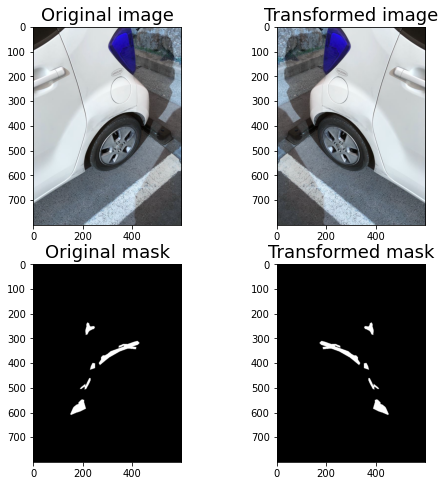

In [ ]:
aug = A.HorizontalFlip(p=1)

augmented = aug(image=image, mask=mask)

image_h_flipped = augmented['image']
mask_h_flipped = augmented['mask']

visualize_multi(image_h_flipped, mask_h_flipped, original_image=image, original_mask=mask)

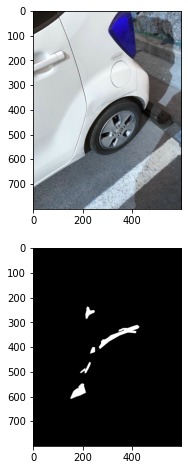

In [ ]:
visualize_multi(image, mask)

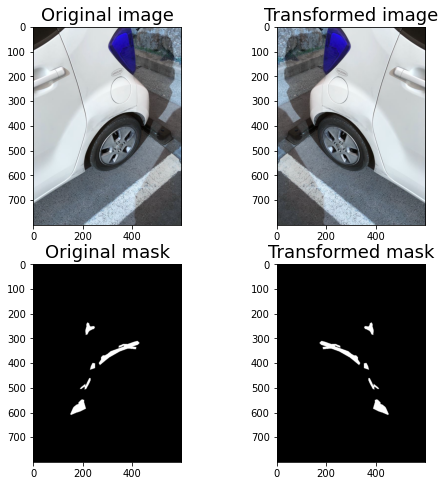

In [ ]:
aug = A.HorizontalFlip(p=1)

augmented = aug(image=image, mask=mask)

image_h_flipped = augmented['image']
mask_h_flipped = augmented['mask']

visualize_multi(image_h_flipped, mask_h_flipped, original_image=image, original_mask=mask)

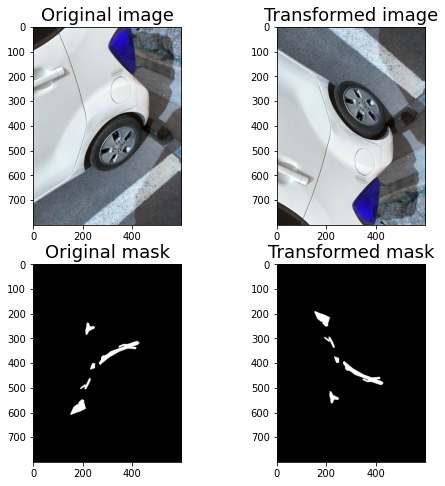

In [ ]:
aug = A.VerticalFlip(p=1)

augmented = aug(image=image, mask=mask)

image_v_flipped = augmented['image']
mask_v_flipped = augmented['mask']

visualize_multi(image_v_flipped, mask_v_flipped, original_image=image, original_mask=mask)

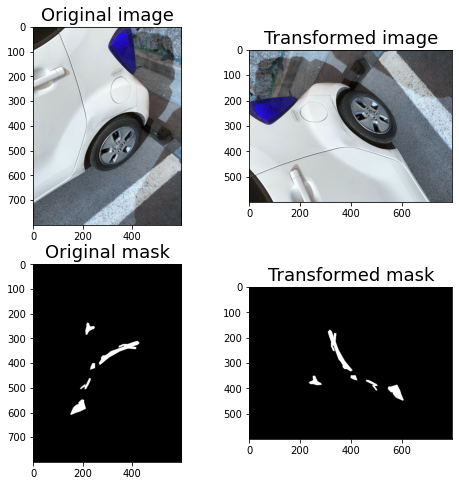

In [ ]:
aug = A.RandomRotate90(p=1)

augmented = aug(image=image, mask=mask)

image_rot90 = augmented['image']
mask_rot90 = augmented['mask']

visualize_multi(image_rot90, mask_rot90, original_image=image, original_mask=mask)

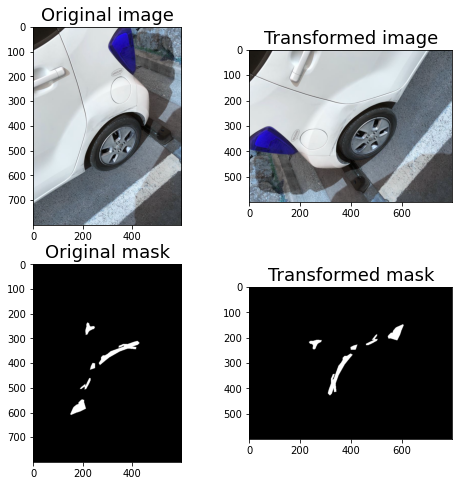

In [ ]:
aug = A.Transpose(p=1)

augmented = aug(image=image, mask=mask)

image_transposed = augmented['image']
mask_transposed = augmented['mask']

visualize_multi(image_transposed, mask_transposed, original_image=image, original_mask=mask)

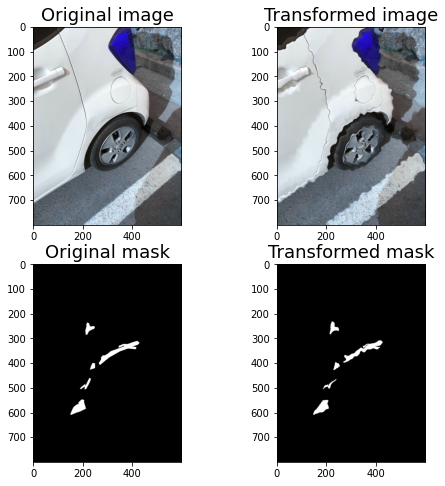

In [ ]:
aug = A.ElasticTransform(p=1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03)

random.seed(7)
augmented = aug(image=image, mask=mask)

image_elastic = augmented['image']
mask_elastic = augmented['mask']

visualize_multi(image_elastic, mask_elastic, original_image=image, original_mask=mask)

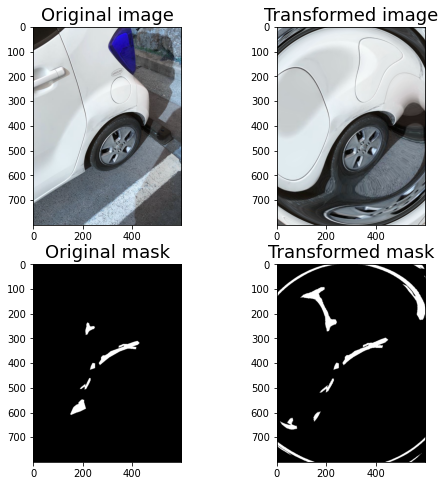

In [ ]:
aug = A.OpticalDistortion(distort_limit=2, shift_limit=0.5, p=1)

random.seed(7)
augmented = aug(image=image, mask=mask)

image_optical = augmented['image']
mask_optical = augmented['mask']

visualize_multi(image_optical, mask_optical, original_image=image, original_mask=mask)

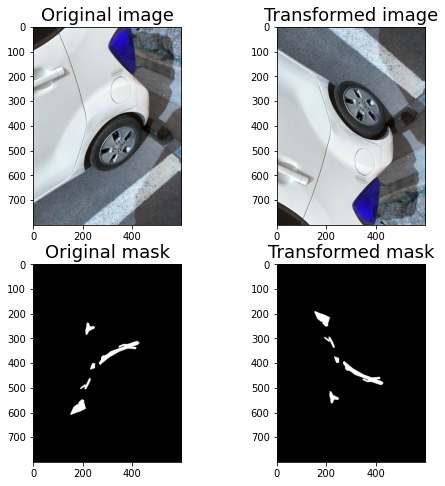

In [ ]:
aug = A.Compose([
    A.VerticalFlip(p=0.5),              
    A.RandomRotate90(p=0.5)]
)

random.seed(7)
augmented = aug(image=image, mask=mask)

image_light = augmented['image']
mask_light = augmented['mask']

visualize_multi(image_light, mask_light, original_image=image, original_mask=mask)